In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/proyecto3/vel.txt' 'vel.txt'
!cp '/content/gdrive/My Drive/proyecto3/21cmsurvey_full.txt' '21cmsurvey_full.txt'

Mounted at /content/gdrive


En el .zip que está en el Classroom junto con el proyecto hay dos archivos (21cmsurvey full.txt a y vel.txt b) en los que hay datos de temperatura de brillo de la lı́nea de 21 cm de HI vs. velocidad de corrimiento para diversos valores de longitud galáctica, pero para latitud cero (o sea, en el plano galáctico).

### a) Según lo visto en clase, demuestre la expresión:
\begin{equation}
R = R_o\frac{v_{\odot}\sin(l)}{v_{LOS}+v_{\odot}\sin(l)},|v| = |v_{\odot}|
\end{equation}

Guiandonos del diagrama geometrio de la clase vemos que:

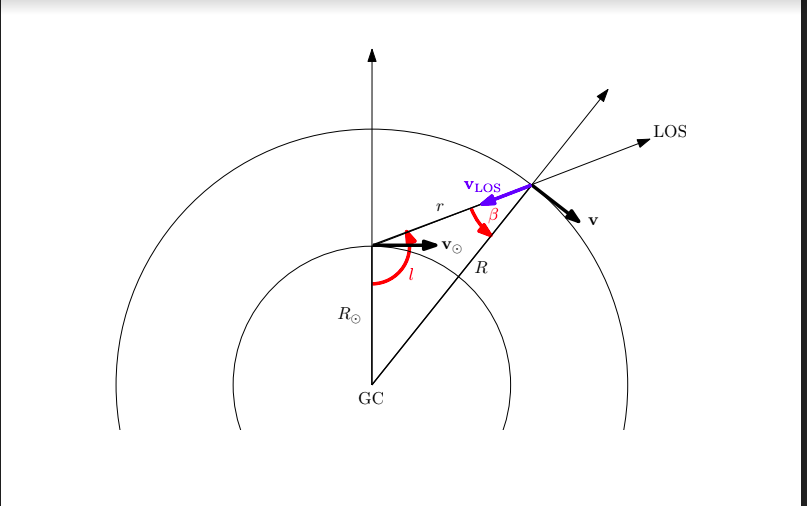

Se añaden y se hacen algunos cambios para tener mejor desarollo del punto, así de esta manera se tiene que:

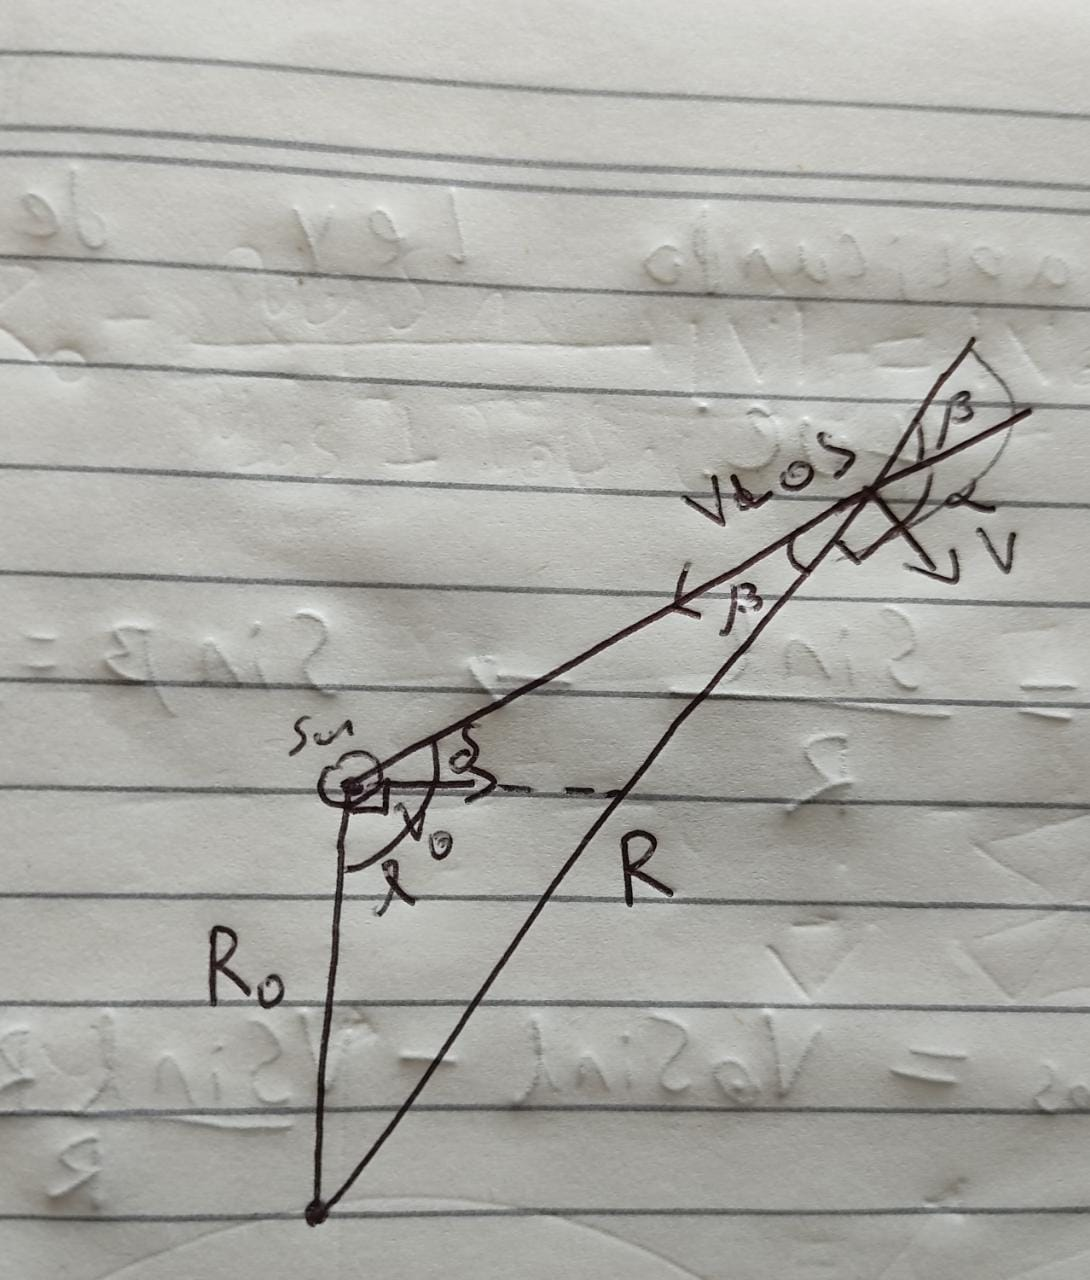

Partimos de: $$v_{LOS} = v\cos(\alpha)-v_{\odot}\cos(\delta)$$

>$v_{LOS}$: velocidad del brazo de la galaxia respecto al observador \\
$v_{\odot}$: velocidad del Sol alrededor del centro de la galaxia \\
$v$: velocidad de la región que se observa en el brazo de galaxia

Vemos que en nuestro dibujo $\delta = l-90°$ y observamos que $180° = 90°+\alpha+\beta \rightarrow \alpha = 90°-\beta$ reemplazamos y tenemos que:
$$v_{LOS} = v\cos(90°-\beta)-v_{\odot}\cos(l-90°)$$

>$l$: longitud galactica (recordemos que estamos trabajando en coordenadas galacticas)

aplicamos sumas de angulos y se obtiene que:$$v_{LOS} = v\sin(\beta)-v_{\odot}\sin(l)$$

Ahora observamos denuevo nuestro triangulo (dibujado o el de la clase) y tomamos el triangulo más grande para aplicar ley de senos en donde nos dice que $\frac{\sin(\beta)}{R_o} = \frac{\sin(l)}{R}$ así despejamos $\sin(\beta)$ para tener todo en terminos de variables conocidas $\sin(\beta) = \frac{\sin(l)}{R}R_o$. Reemplazando:

$$v_{LOS} = v\frac{\sin(l)}{R}R_o - v_{\odot}\sin(l)$$

>$R$: La distancia del centro de la galaxia hasta el brazo \\
$R_o$: La distancia del centro de la galaxia hasta nuestro Sol

$$v_{LOS} = v\frac{\sin(l)}{R}R_o - v_{\odot}\sin(l) \rightarrow v_{LOS} + v_{\odot}\sin(l) = v\frac{\sin(l)}{R}R_o \rightarrow \frac{v_{LOS} + v_{\odot}\sin(l)}{v \sin(l) R_o} = \frac{1}{R} \rightarrow R = R_o\frac{v\sin(l)}{v_{LOS}+v_{\odot}\sin(l)}$$

>Siendo la cruva de rotación es plana, las magnitudes de la $|v_{\odot}| = |v|$

De esta manera se demuestra que: $$R = R_o\frac{v_{\odot}\sin(l)}{v_{LOS}+v_{\odot}\sin(l)}$$

### b) Ajuste una función gaussiana para el pico principal (correspondiente a la emisión de gas en el brazo de Perseo) para **cada una de las longitudes**, considerando únicamente las velocidades comprendidas entre $-15$ y $-50 \ km/s$. Haga tres gráficas (correspondientes al valor mínimo, medio, y máximo de longitud galáctica) que muestren que su ajuste de los espectros a funciones gaussianas es razonable.

In [3]:
vel = np.loadtxt('vel.txt')/1000
a = np.loadtxt('21cmsurvey_full.txt')

spgr=a[1:]

Tabla = pd.read_csv('21cmsurvey_full.txt', delimiter=" ")


Valor mínimo de la longitud galactica

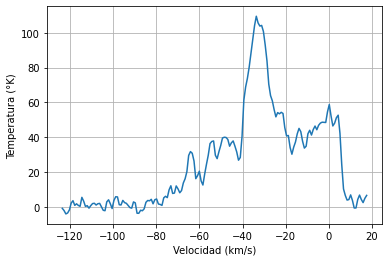

In [4]:
plt.plot(vel,Tabla.iloc[:,0])
#plt.plot(vel,spgr[:,0])
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.grid()

In [5]:
!pip install lmfit

     |████████████████████████████████| 306 kB 13.6 MB/s 
     |████████████████████████████████| 98 kB 6.4 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.2-py3-none-any.whl size=85275 sha256=660b1bdfda994e728d19bc19bea716ce2ccea575677f639266d2ecd7114e1b4e
  Stored in directory: /root/.cache/pip/wheels/42/81/51/72ff0f8e216caa9fe1e9dd1e7c287274b1eb75c79bfc858f5b
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=cb1a4d8a440988034d5fe315494c9348780c855b96ce2db7612d1bd066697d7b
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


Definimos una función basa en el [código](https://github.com/saint-germain/cgps_gal_21cm_preprocess/blob/master/explore_21cm_clase_sep_7.ipynb) de la clase pasada, en donde solamente le daremos los valores de la tabla para que nos de los valores de la amplitud, sigma y mu para sacar la gaussiana.

In [6]:
from lmfit.models import ExponentialModel, GaussianModel

def gaus(y):

  gauss1 = GaussianModel(prefix='g1_')
  pars=gauss1.make_params()

  pars['g1_center'].set(value=-30, min=-50, max=-20) #mu
  pars['g1_sigma'].set(value=2, min=1,max=10) #sigma
  pars['g1_height'].set(min=20,max=3000) #A
                          

  mod = gauss1

  out = mod.fit(y, pars, x=vel)

  return (out.params['g1_center'].value, out.params['g1_sigma'].value, out.params['g1_height'].value)

In [43]:
perseo = np.zeros((len(spgr),3))

for i in range(len(spgr)):
  perseo[i] = gaus(spgr[:,i])

In [8]:
params_perseo= np.zeros((len(Tabla.columns),3))

for i in range(len(Tabla.columns)):
  params_perseo[i] = gaus(Tabla.iloc[:,i])

Función del ajuste

In [9]:
def ajuste(x,mu,sigma,A):
  return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [10]:
len(perseo)

172

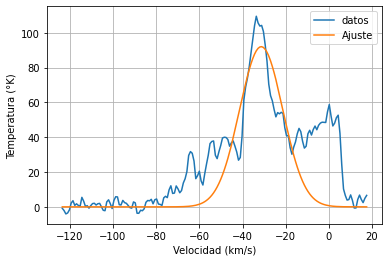

In [54]:
ts = ajuste(vel,params_perseo[0][0],params_perseo[0][1],params_perseo[0][2])
#ts = ajuste(vel,perseo[0][0],perseo[0][1],perseo[0][2])

x=vel
#y1=spgr[:,0]
y1=Tabla.iloc[:,0]
y2=ts

plt.grid()
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.plot(x,y1, label="datos")
plt.plot(x,y2, label="Ajuste")
plt.legend()

Valor medio  de la longitud galactica

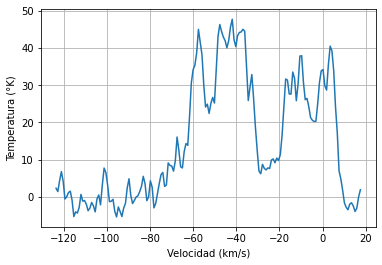

In [12]:
plt.plot(vel,Tabla.iloc[:,512])
#plt.plot(vel,spgr[:,512])
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.grid()

In [13]:
len(perseo)/2

86.0

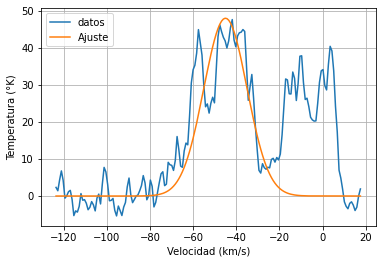

In [55]:
ts = ajuste(vel,params_perseo[int(len(Tabla.columns)/2)][0],params_perseo[int(len(Tabla.columns)/2)][1],params_perseo[int(len(Tabla.columns)/2)][2])
#ts = ajuste(vel,perseo[int(len(spgr)/2)][0],perseo[int(len(spgr)/2)][1],perseo[int(len(spgr)/2)][2])

x=vel
y1=Tabla.iloc[:,512]
#y1=spgr[:,512]
y2=ts

plt.grid()
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.plot(x,y1, label="datos")
plt.plot(x,y2, label="Ajuste")
plt.legend()

Valor máximo  de la longitud galactica

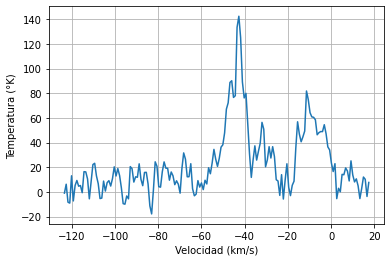

In [57]:
#plt.plot(vel,Tabla.iloc[:,-1])
plt.plot(vel,spgr[:,-1])
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.grid()

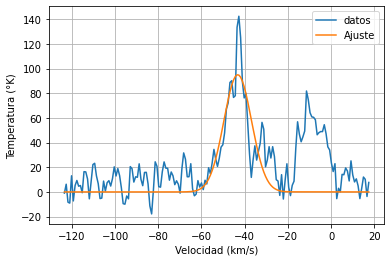

In [58]:
ts = ajuste(vel,params_perseo[-1][0],params_perseo[-1][1],params_perseo[-1][2])
#ts = ajuste(vel,perseo[-1][0],perseo[-1][1],perseo[-1][2])

x=vel
y1=Tabla.iloc[:,-1]
#y1=spgr[:,-1]
y2=ts

plt.grid()
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Temperatura (°K)')
plt.plot(x,y1, label="datos")
plt.plot(x,y2, label="Ajuste")
plt.legend()

Vamos a confirmar nuestros ajustes haciendolo de manera individual

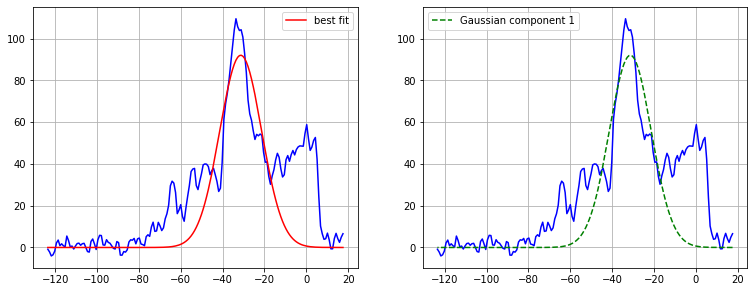

In [17]:
y = spgr[:,0]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-50, max=-15)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

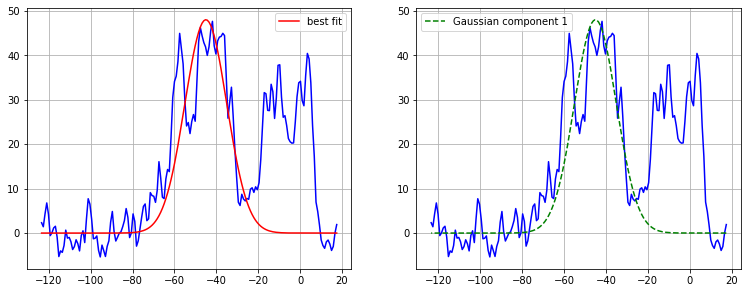

In [18]:
y = spgr[:,512]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-50, max=-20)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

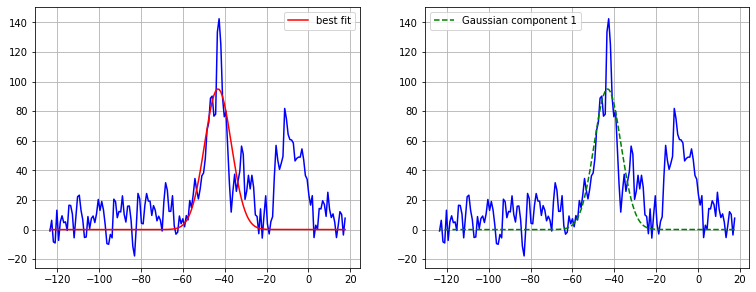

In [19]:
y = spgr[:,-1]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-50, max=-20)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

### c) Usando el centro (valor medio) de cada gaussiana, haga una gráfica de longitud galáctica $l$ vs. $R$ (radio respecto al centro de la galaxia) para el brazo de Perseo. Incluya un intervalo de confianza ($2\sigma$) para $R$ para cada longitud a partir de la varianza gaussiana.

Usando la ecuación del primer punto

In [20]:
DEG = np.pi/180
RAD = 1/DEG

def R(l,v):
  R_o = 8 #kpc
  v_o = 225 #km/s
  return (R_o*v_o*np.sin(l*DEG))/(v+v_o*np.sin(l*DEG))

Guardamos todo en una lista

In [60]:
l = np.zeros(len(Tabla.columns))
r = np.zeros(len(Tabla.columns))
confianza = np.zeros(len(Tabla.columns))

for i in range(len(Tabla.columns)):
  l[i] = float(Tabla.columns[i])
  r[i] = R(float(Tabla.columns[i]), params_perseo[i][0])
  confianza[i] = R(l[i], params_perseo[i][1])

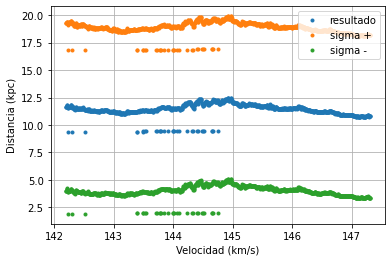

In [61]:
dist_mas = confianza + r
dist_men = r - confianza
plt.plot(l,r, '.', label="resultado")
plt.plot(l,dist_mas, '.', label="sigma +")
plt.plot(l,dist_men, '.', label="sigma -")

#plt.grid()
#plt.ylim(0,20)

plt.grid()
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Distancia (kpc)')
plt.legend()

### d) Repita los dos puntos anteriores para el brazo externo, identificando el rango adecuado de velocidades

Aplicamos lo mismo que en el punto b) para el brazo externo, pero cambiaremos los valores de la velocidad min y max. En donde a mi parecer lo que más se ajusta para la gaussiana está entre $-80$ y $-60 \ km/s$. 

In [62]:
def gausExt(y):

  gauss1 = GaussianModel(prefix='g1_')
  pars=gauss1.make_params()

  pars['g1_center'].set(value=-75, min=-80, max=-60) #mu
  pars['g1_sigma'].set(value=2, min=1,max=10) #sigma
  pars['g1_height'].set(min=20,max=3000) #A
                          

  mod = gauss1

  out = mod.fit(y, pars, x=vel)

  return (out.params['g1_center'].value, out.params['g1_sigma'].value, out.params['g1_height'].value)

In [63]:
externo = np.zeros((len(spgr),3))

for i in range(len(spgr)):
  externo[i] = gausExt(spgr[:,i])

Valor minimo para el brazo externo

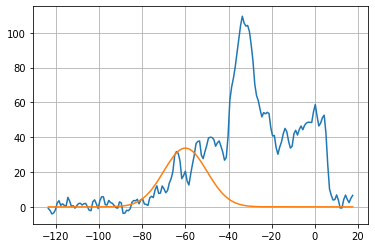

In [64]:
ts = ajuste(vel,externo[0][0],externo[0][1],externo[0][2])

x=vel
y1=spgr[:,0]
#y1=Tabla.iloc[:,0]
y2=ts

plt.grid()
plt.plot(x,y1)
plt.plot(x,y2)

Valor medio para el brzo externo

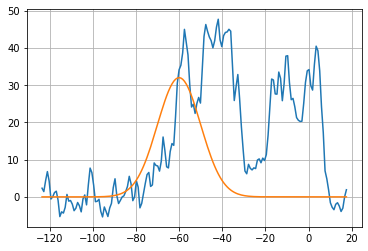

In [65]:
ts = ajuste(vel,externo[86][0],externo[86][1],externo[86][2])

x=vel
y1=spgr[:,512]
#y1=Tabla.iloc[:,0]
y2=ts

plt.grid()
plt.plot(x,y1)
plt.plot(x,y2)

Valor máximo del brazo externo

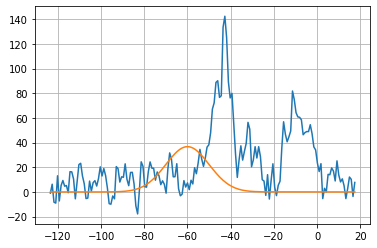

In [66]:
ts = ajuste(vel,externo[-1][0],externo[-1][1],externo[-1][2])

x=vel
y1=spgr[:,-1]
#y1=Tabla.iloc[:,0]
y2=ts

plt.grid()
plt.plot(x,y1)
plt.plot(x,y2)

Comprobando valores

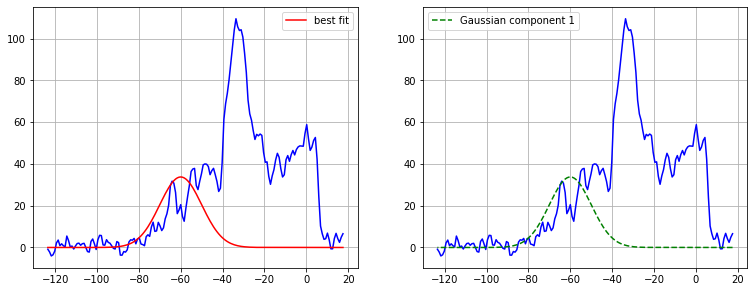

In [69]:
y = spgr[:,0]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-75, min=-80, max=-60)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

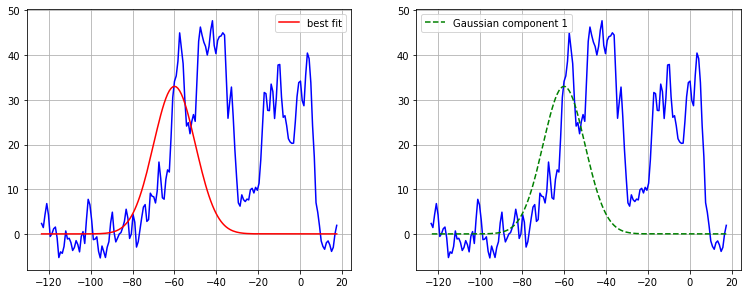

In [70]:
y = spgr[:,512]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-75, min=-80, max=-60)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

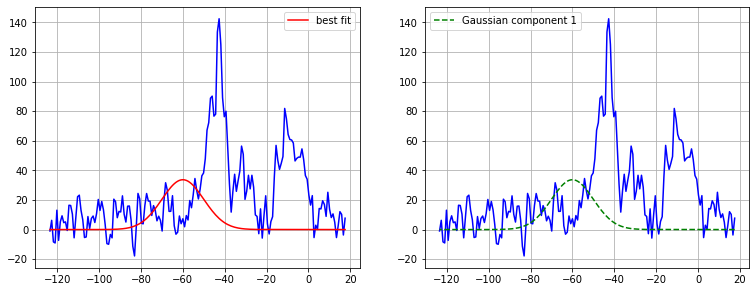

In [71]:
y = spgr[:,-1]
x = vel


gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-75, min=-80, max=-60)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)

mod = gauss1
out = mod.fit(y, pars, x=x)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')

axes[0].grid()
axes[1].grid()

axes[1].legend(loc='best')

$l$ vs $R$

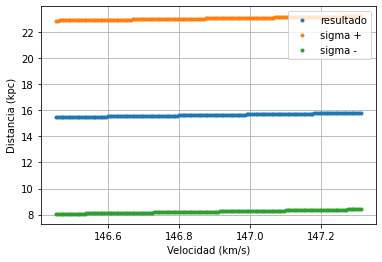

In [72]:
spgl = a[0:172]

l = np.zeros(len(spgl))
r = np.zeros(len(spgl))
confianza = np.zeros(len(spgl))

for i in range(len(spgl)):
  l[i] = spgl[0,i]
  r[i] = R(spgl[0,i], externo[i][0])
  confianza[i] = R(l[i], externo[i][1])

dist_mas = confianza + r
dist_men = r - confianza
plt.plot(l,r, '.', label="resultado")
plt.plot(l,dist_mas, '.', label="sigma +")
plt.plot(l,dist_men, '.', label="sigma -")

#plt.grid()
#plt.ylim(0,20)

plt.grid()
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Distancia (kpc)')
plt.legend()